In [1]:
### In this note, validation sets are used in addition to training and test sets
### Data from company ratios
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

C:\Users\kglim\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('co_fin_ratios.csv',header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))

(35074, 52)
['datadate', 'fyear', 'tic', 'Company Name', 'CASH_DEBT', 'CURRENT', 'PCHG_CURRENT', 'QUICK', 'PCHG_QUICK', 'DAYS_SALEAR', 'PCHG_DAYS_SALEAR ', 'DEBT_EQ', 'PCHG_DEBT_EQ ', 'DEPR_PPE', 'PCHG_DEPR_PPE', 'DIV_CASH', 'EQ_FA', 'PCHG_EQ_FA', 'INV_TURN', 'PCHG_INV_TURN', 'INVT_AT', 'PCHG_INVT_AT', 'LTDEBT_EQ', 'NI_CF', 'PCHG_OPMBD', 'PCHG_PTPM', 'REPAY_DEBT', 'ROA', 'SALE_AT', 'PCHG_SALE_AT', 'SALE_CASH', 'SALE_FA', 'SALE_INVT', 'PCHG_SALE_INVT ', 'SALE_NWC', 'PCHG_SALE_NWC', 'SALE_RECT', 'TIE', 'PCHG_TIE', 'WKCAP_AT', 'PCHG_WKCAP_AT', 'PCHG_AT', 'PCHG_COGS', 'PCHG_DEPR', 'PCHG_DLTT', 'PCHG_INVT', 'PCHG_SALE', 'PCHG_WORKINGCAP', 'CHG_DIVIDEND', 'PE_RATIO', 'PCHG_PE_RATIO', 'NPM_FWD_CHG']


In [3]:
data.info()
### In accounting data, check for 'object' type data e.g. #DIV/0! when a no. is divided by 0
### Remove the above as it will not run in most app packages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35074 entries, 0 to 35073
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datadate           35074 non-null  object 
 1   fyear              35074 non-null  int64  
 2   tic                35074 non-null  object 
 3   Company Name       35074 non-null  object 
 4   CASH_DEBT          35074 non-null  float64
 5   CURRENT            35074 non-null  float64
 6   PCHG_CURRENT       35074 non-null  float64
 7   QUICK              35074 non-null  float64
 8   PCHG_QUICK         35074 non-null  float64
 9   DAYS_SALEAR        35074 non-null  float64
 10  PCHG_DAYS_SALEAR   35074 non-null  float64
 11  DEBT_EQ            35074 non-null  float64
 12  PCHG_DEBT_EQ       35074 non-null  float64
 13  DEPR_PPE           35074 non-null  float64
 14  PCHG_DEPR_PPE      35074 non-null  float64
 15  DIV_CASH           35074 non-null  float64
 16  EQ_FA              350

In [4]:
### exploring the data/ .value_counts -- Return a Series containing counts of unique values.
data['NPM_FWD_CHG'].value_counts()

1    17689
0    17385
Name: NPM_FWD_CHG, dtype: int64

In [5]:
pd.set_option('display.max_columns', None) ### to show all columns
### Explore features mean of of features with NPM_FWD_CHG
data.groupby('NPM_FWD_CHG').mean(numeric_only=True)

,fyear,CASH_DEBT,CURRENT,PCHG_CURRENT,QUICK,PCHG_QUICK,DAYS_SALEAR,PCHG_DAYS_SALEAR,DEBT_EQ,PCHG_DEBT_EQ,DEPR_PPE,PCHG_DEPR_PPE,DIV_CASH,EQ_FA,PCHG_EQ_FA,INV_TURN,PCHG_INV_TURN,INVT_AT,PCHG_INVT_AT,LTDEBT_EQ,NI_CF,PCHG_OPMBD,PCHG_PTPM,REPAY_DEBT,ROA,SALE_AT,PCHG_SALE_AT,SALE_CASH,SALE_FA,SALE_INVT,PCHG_SALE_INVT,SALE_NWC,PCHG_SALE_NWC,SALE_RECT,TIE,PCHG_TIE,WKCAP_AT,PCHG_WKCAP_AT,PCHG_AT,PCHG_COGS,PCHG_DEPR,PCHG_DLTT,PCHG_INVT,PCHG_SALE,PCHG_WORKINGCAP,CHG_DIVIDEND,PE_RATIO,PCHG_PE_RATIO
NPM_FWD_CHG,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2001.521139,0.006992,3.091723,0.954815,2.589178,0.923675,72.705352,0.539716,4.845530,-5.560814,0.240801,0.645397,0.126130,3.195444,3.941233,23.039529,0.626135,0.101202,0.085924,0.543104,0.679706,0.011245,0.109748,3.039749,-1.800318,0.965722,0.241263,103.490323,6.549234,35.103843,0.155191,-2.658623,-0.160202,16.110079,56.855048,0.508385,-2.191943,5.858851,1.460285,1.006174,0.668223,6.231445,0.377806,0.491987,0.919357,0.092380,12.333564,-0.003908
1,2001.315450,-0.246465,2.644065,0.499522,2.123033,0.505401,118.656164,0.536339,1.556738,0.231099,0.184892,1.011454,0.135898,2.904657,2.320081,30.662360,0.483595,0.109037,0.133399,0.528088,0.941710,1.017619,0.609091,5.558038,-0.830364,1.078649,0.569648,136.500861,4.234464,36.545418,0.279525,10.733797,-0.493953,14.552608,14.946264,1.488158,-0.996820,0.058552,1.598640,1.324735,1.259589,8.504917,0.295322,1.001493,0.006776,0.114453,14.235614,0.402736


In [6]:
data.shape

(35074, 52)

In [7]:
X=data.drop(columns=['NPM_FWD_CHG','datadate','fyear','tic','Company Name'])
print(X)

       CASH_DEBT   CURRENT  PCHG_CURRENT     QUICK  PCHG_QUICK  DAYS_SALEAR  \
0       0.551339  0.848913     -0.525573  0.848913   -0.525573    12.463769   
1       0.302897  0.940320      0.000000  0.940320    0.000000    22.760781   
2       0.142208  0.555512     -0.226086  0.480517   -0.272465    31.334180   
3       0.164068  0.919019      0.000000  0.568069    0.000000    20.450661   
4       0.157582  0.964838      0.049856  0.633525    0.115226    24.803240   
...          ...       ...           ...       ...         ...          ...   
35069   0.089018  1.576001     -0.194893  1.171758   -0.283789   158.243307   
35070   0.688344  2.698593      0.712304  2.089793    0.783469    97.106151   
35071   0.149488  2.257205     -0.163562  1.601405   -0.233702   109.248080   
35072   0.203521  1.851457     -0.179757  1.384079   -0.135710   115.797118   
35073   0.177581  1.766476     -0.045899  1.257091   -0.091749   110.942369   

       PCHG_DAYS_SALEAR     DEBT_EQ  PCHG_DEBT_EQ  

In [8]:
y=data['NPM_FWD_CHG']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
35069    1
35070    0
35071    1
35072    0
35073    0
Name: NPM_FWD_CHG, Length: 35074, dtype: int64


In [9]:
X.shape, y.shape

((35074, 47), (35074,))

In [10]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [11]:
print(X)

       const  CASH_DEBT   CURRENT  PCHG_CURRENT     QUICK  PCHG_QUICK  \
0        1.0   0.551339  0.848913     -0.525573  0.848913   -0.525573   
1        1.0   0.302897  0.940320      0.000000  0.940320    0.000000   
2        1.0   0.142208  0.555512     -0.226086  0.480517   -0.272465   
3        1.0   0.164068  0.919019      0.000000  0.568069    0.000000   
4        1.0   0.157582  0.964838      0.049856  0.633525    0.115226   
...      ...        ...       ...           ...       ...         ...   
35069    1.0   0.089018  1.576001     -0.194893  1.171758   -0.283789   
35070    1.0   0.688344  2.698593      0.712304  2.089793    0.783469   
35071    1.0   0.149488  2.257205     -0.163562  1.601405   -0.233702   
35072    1.0   0.203521  1.851457     -0.179757  1.384079   -0.135710   
35073    1.0   0.177581  1.766476     -0.045899  1.257091   -0.091749   

       DAYS_SALEAR  PCHG_DAYS_SALEAR     DEBT_EQ  PCHG_DEBT_EQ   DEPR_PPE  \
0        12.463769          -0.297691   0.6266

In [12]:
### now perform logit regression using statsmodel packaage
### using statsmodel here (and sklearn logistic regression later) more conveniently provides 
### regression estimates and p-values so that exceedingly insignificant features can be 
### discarded due to their redundancy or multicollinearity with other features
import statsmodels.api as sm
result=sm.Logit(y,X).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.689962
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            NPM_FWD_CHG   No. Observations:                35074
Model:                          Logit   Df Residuals:                    35026
Method:                           MLE   Df Model:                           47
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                0.004541
Time:                        13:08:40   Log-Likelihood:                -24200.
converged:                       True   LL-Null:                       -24310.
Covariance Type:            nonrobust   LLR p-value:                 2.449e-24
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0412      0.018     -2.315      0.021      -0.076      -0.006
CASH_DEB

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
Lresult=logreg.fit(X_train, y_train)

C:\Users\kglim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


In [15]:
print(Lresult.coef_, Lresult.intercept_)

[[ 3.55427067e-04 -5.45301317e-03 -4.11522425e-03 -6.24887559e-04
  -4.37239530e-03  5.66123530e-04  1.52525676e-04 -1.22638379e-03
   1.47647482e-04 -5.83456174e-04  7.81204331e-04  5.02353664e-04
   7.54321453e-05 -1.28190488e-03 -3.26469808e-04  1.42067729e-04
  -2.75907322e-04  2.07561228e-04  1.58405502e-03 -2.00859888e-04
   1.88571402e-03  1.62987467e-03 -5.82343093e-04  1.40610773e-04
   3.37545904e-04  2.54481600e-03  3.55187534e-03  1.33238817e-05
  -2.71941836e-04 -9.36628841e-05  7.53942876e-04  7.03594737e-05
  -2.23990195e-04 -6.44753543e-05 -2.84982151e-05  4.78682160e-05
   5.41834797e-04 -5.06534305e-04  2.43442800e-05 -8.64701792e-05
   1.42817280e-03 -1.30836001e-05 -1.02298156e-03  2.44828507e-03
  -1.90807105e-05 -6.59423370e-04  2.69440500e-04 -1.33257914e-04]] [0.00035543]


In [16]:
np.sum(y_test)

5302

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2522 2699]
 [2195 3107]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
### classification_report(y_test, y_pred, digits=8) # will give more decimal places

              precision    recall  f1-score   support

           0       0.53      0.48      0.51      5221
           1       0.54      0.59      0.56      5302

    accuracy                           0.53     10523
   macro avg       0.53      0.53      0.53     10523
weighted avg       0.53      0.53      0.53     10523



In [19]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_logreg = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_logreg)  
    # matches y_test of 1's and 0's versus pred prob of 1's for each of the 10,523 test cases
    # sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    # this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
    
    # above can also be done using: fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_logreg = metrics.auc(fpr, tpr)
    # sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
    # Compute Area Under the Curve (AUC) using the trapezoidal rule.
    # This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score. 
roc_auc_logreg

0.5533768069942997

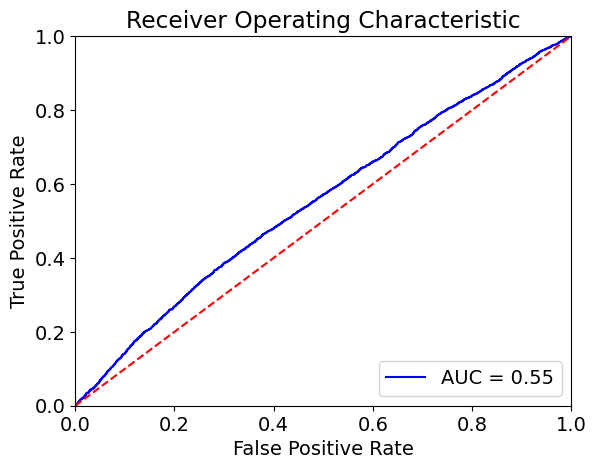

In [20]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Next we standardize the features to see if there is any regression improvements

In [21]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
#`StandardScaler` in `sklearn.preprocessing` module is used to 
# standardize features by removing the mean and scaling to unit variance.
X1=scaler.fit_transform(X)

In [23]:
type(X1)

numpy.ndarray

In [24]:
X1=pd.DataFrame(X1)
X1.describe()
# Below we check X1 is standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
count,35074.0,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04,3.507400e+04
mean,0.0,2.449544e-17,-1.040221e-17,-3.540322e-17,2.540370e-17,-1.160058e-16,1.134598e-17,-2.764283e-16,3.292344e-17,-1.491864e-16,5.466155e-18,1.269332e-16,1.076225e-15,-1.423786e-17,2.981215e-17,1.883536e-16,9.398508e-17,-9.643500e-16,-4.106553e-16,-1.126136e-15,-2.673806e-17,5.245558e-17,-1.591635e-16,-1.969170e-16,-1.106575e-17,-4.698838e-17,7.329845e-16,8.868664e-17,-6.631942e-17,-2.854613e-16,-1.874979e-16,5.947231e-17,-1.431592e-16,2.884274e-16,2.170674e-16,-1.355421e-16,1.528183e-17,-2.925182e-16,-2.973834e-16,-9.972706e-17,4.543023e-17,6.396027e-16,-5.443536e-16,3.299348e-16,2.064882e-17,-6.509369e-16,2.000160e-17,-6.487952e-17
std,0.0,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,0.0,-7.979167e+01,-3.371250e-01,-9.379540e-02,-5.699645e-01,-4.853295e-01,-7.067003e+00,-3.874670e-01,-5.177146e+00,-1.872120e+02,-5.282948e-02,-2.258068e-02,-1.118373e+02,-1.750964e+02,-8.490956e+00,-2.053491e-01,-5.391996e-02,-9.325330e-01,-1.546174e+00,-1.069884e+02,-4.136848e+01,-6.940083e+01,-6.378807e+01,-2.793376e-02,-1.335393e+02,-1.009869e+01,-1.372930e-01,-7.801122e+00,-9.264651e-02,-3.956648e-01,-2.421316e-01,-6.920598e+01,-8.134554e+01,-7.839248e-01,-3.973300e+01,-1.514441e+02,-1.110950e+02,-7.677401e+00,-2.608830e-02,-1.412367e-01,-2.686068e-02,-2.522548e-02,-7.640643e-01,-2.727453e-01,-8.720581e+01,-2.085571e-01,-3.238607e+01,-7.901202e+01
25%,0.0,2.381742e-02,-2.099436e-01,-3.255215e-02,-1.893049e-01,-4.006309e-02,-3.672597e-02,-2.601885e-02,-8.896534e-03,4.669581e-03,-3.865073e-02,-1.126753e-02,-7.575670e-02,-5.835590e-03,-7.756025e-03,-5.341956e-02,-1.636133e-02,-7.777026e-01,-5.454512e-02,-2.209830e-02,-1.843966e-02,-1.589103e-02,-1.300276e-02,-2.315197e-02,2.247931e-02,-1.921359e-01,-2.495852e-02,-6.591128e-02,-4.439393e-02,-9.105634e-02,-4.406448e-02,-7.912253e-03,-9.347476e-06,-4.837079e-02,-2.613735e-02,-1.334352e-02,2.816503e-02,-8.566694e-03,-1.599211e-02,-2.331557e-02,-1.342142e-02,-2.249243e-02,-2.843255e-02,-2.857555e-02,-9.408907e-03,-1.956318e-02,-1.316785e-01,-1.131463e-02
50%,0.0,4.304418e-02,-1.353074e-01,-2.687801e-02,-1.374842e-01,-3.216793e-02,-2.611054e-02,-2.162406e-02,-7.054342e-03,4.964857e-03,-3.273469e-02,-1.021717e-02,-7.575670e-02,-4.922757e-03,-7.444015e-03,-4.743853e-02,-1.451584e-02,-3.963646e-01,-3.134269e-02,-1.221214e-02,-7.209307e-03,-1.234697e-02,-5.979605e-03,-2.259430e-02,2.364000e-02,-6.958303e-02,-2.097777e-02,-6.016097e-02,-3.463374e-02,-7.956746e-02,-3.348940e-02,-1.976877e-03,5.437920e-03,-3.936686e-02,-2.390430e-02,-9.834394e-03,3.066468e-02,-7.756340e-03,-1.526611e-02,-2.180402e-02,-1.239170e-02,-2.221457e-02,-2.639061e-02,-2.582846e-02,-5.724766e-03,-1.956318e-02,-1.683741e-02,-

In [25]:
# check correlation of features after standardization
cor=X1.corr()

In [26]:
count = np.count_nonzero(cor > 0.9)
print(count)

53


# PCA -- here we use Principal Component Analysis method to reduce the dimension of the features and make combinations of them (the principal components) to be independent one from another as the raw X1 contains too many highly correlated standardized features

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 47)
pc = pca.fit_transform(X1)
print('explained variance ratio: %s' %pca.explained_variance_ratio_)
# % is used for string formatting placed in front of following numbers

explained variance ratio: [0.05183334 0.04664873 0.04402974 0.04330785 0.04119352 0.04107028
 0.03985298 0.03542389 0.033818   0.03049519 0.02525618 0.02363967
 0.02324064 0.02235872 0.02181575 0.02179855 0.02147621 0.02141851
 0.02131531 0.02129143 0.0212768  0.02123959 0.02113885 0.021079
 0.02092839 0.02087299 0.02062019 0.02056914 0.01983438 0.01934671
 0.01905125 0.01866613 0.01784745 0.01716822 0.01650159 0.01479251
 0.01069929 0.01028556 0.00737799 0.00710649 0.00668856 0.00589261
 0.0042024  0.00306136 0.00134249 0.00068641 0.00043914]


- We can show the contribution of different eigenvalues to the data description by **explained variance ratios**, that is, the ratio of each eigenvalue to the sum of all eigenvalues.

- **Cumulative explained variance** is the total contribution value of each attribute/feature.

Text(0, 0.5, 'cumulative explained variance')

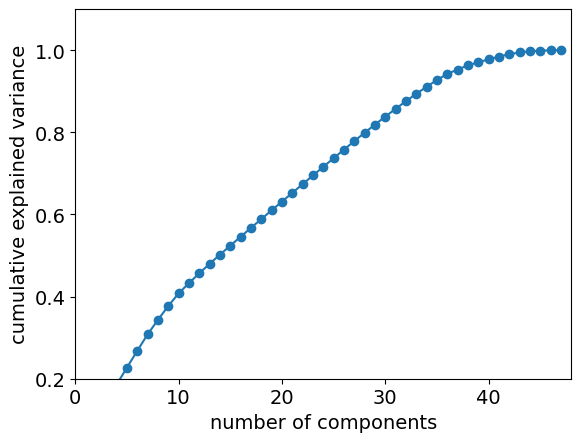

In [28]:
plt.plot(range(1,48),np.cumsum(pca.explained_variance_ratio_))
plt.scatter(range(1,48),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,48)
plt.ylim(0.2,1.1)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [29]:
pc_X = pd.DataFrame(pc,columns = ['pc_1','pc_2','pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10', 
                                     'pc_11', 'pc_12','pc_13','pc_14','pc_15','pc_16','pc_17','pc_18','pc_19','pc_20', 
                                     'pc_21', 'pc_22','pc_23','pc_24','pc_25','pc_26','pc_27','pc_28','pc_29','pc_30',
                                     'pc_31', 'pc_32','pc_33','pc_34','pc_35','pc_36','pc_37','pc_38','pc_39','pc_40',
                                     'pc_41', 'pc_42','pc_43','pc_44','pc_45','pc_46','pc_47'])                                               

In [30]:
# Check
pc_X.corr()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33,pc_34,pc_35,pc_36,pc_37,pc_38,pc_39,pc_40,pc_41,pc_42,pc_43,pc_44,pc_45,pc_46,pc_47
pc_1,1.000000e+00,-5.879279e-16,-1.787905e-16,2.365189e-16,1.929557e-16,-2.712972e-16,-1.961172e-16,1.105489e-15,4.900811e-16,-2.671667e-16,-7.997044e-17,1.416742e-16,2.334557e-17,-1.402152e-16,5.013278e-17,-9.420845e-18,1.825894e-17,2.333910e-17,-2.865523e-17,-8.436970e-18,-5.192806e-18,8.702765e-17,-1.062027e-16,-2.098361e-18,-6.547801e-17,2.021906e-17,-3.393211e-17,-7.413542e-17,2.173836e-16,3.774097e-17,-9.404872e-18,7.033505e-16,-2.824738e-17,1.208928e-16,-3.435745e-16,3.122347e-17,-1.360574e-15,2.650018e-16,-3.212180e-16,-2.081999e-16,6.060673e-16,-1.091808e-19,-3.538945e-17,-6.661934e-16,1.280770e-16,-2.476081e-16,6.763831e-17
pc_2,-5.879279e-16,1.000000e+00,5.915707e-16,-1.002489e-16,6.630062e-16,2.359486e-16,-2.580758e-16,-9.241745e-17,5.426316e-16,-9.375678e-17,5.797655e-17,-1.990589e-17,-5.103185e-17,3.064394e-17,8.467716e-17,6.186469e-17,-1.367513e-17,-2.088854e-17,-2.846576e-17,-4.288465e-18,2.123819e-17,-1.225459e-18,-3.264517e-17,-6.894645e-17,4.518897e-17,7.263647e-17,4.668939e-18,-3.164586e-17,-6.379136e-17,1.816735e-17,-1.792332e-17,1.438738e-18,2.246895e-15,-1.432174e-16,3.314390e-17,2.305503e-15,-2.056623e-17,3.314260e-16,-6.609337e-17,-1.981842e-16,-2.956160e-17,5.489285e-16,-1.394573e-17,-2.747166e-17,-6.495817e-18,2.344630e-16,1.639959e-17
pc_3,-1.787905e-16,5.915707e-16,1.000000e+00,-1.812738e-15,2.234665e-16,-3.247874e-16,1.658573e-15,7.561624e-17,2.169542e-17,-1.841633e-16,-1.719368e-16,3.977324e-17,-1.278852e-18,-1.276553e-17,-2.043012e-16,-4.064615e-17,-5.817109e-17,4.576250e-17,7.362206e-17,-3.253537e-17,1.115174e-17,-2.117374e-16,7.704991e-17,-3.582793e-17,-6.969901e-17,3.167110e-17,-8.542762e-18,3.414232e-16,-2.897170e-16,2.023002e-17,3.350685e-17,1.346961e-17,-4.308683e-16,-7.155112e-17,-5.605560e-17,2.194835e-16,6.208675e-18,2.785292e-16,9.465682e-17,3.510171e-16,-2.577097e-17,5.496708e-17,7.351381e-18,-3.178096e-16,3.517514e-16,6.019276e-17,1.388642e-16
pc_4,2.365189e-16,-1.002489e-16,-1.812738e-15,1.000000e+00,9.626894e-16,1.033173e-15,-4.875772e-16,-9.592507e-17,-1.394654e-15,-1.359194e-16,-1.042596e-16,-8.185465e-17,4.850740e-17,-7.133070e-17,-7.242403e-17,2.267608e-16,1.655290e-17,-5.542099e-17,2.103716e-17,3.484373e-17,6.974147e-17,1.397244e-17,3.741799e-17,9.132039e-18,3.163635e-17,4.260555e-17,7.455600e-17,7.278883e-17,1.103523e-16,-5.149151e-18,1.881764e-17,-3.297006e-17,-1.056373e-16,-1.943092e-16,-1.264330e-16,4.165245e-17,2.250517e-17,-1.149388e-16,3.516240e-17,6.055813e-16,6.594046e-17,1.121085e-17,-7.445879e-16,2.150670e-16,-1.952855e-16,7.888789e-16,1.903420e-16
pc_5,1.929557e-16,6.630062e-16,2.234665e-16,9.626894e-16,1.000000e+00,4.394931e-16,5.967615e-16,2.212037e-16,5.645697e-16,8.513845e-16,-2.014844e-16,-5.606703e-18,-1.270729e-16,1.978807e-16,-3.017168e-17,1.024383e-16,3.682549e-17,-1.851336e-17,-5.441377e-17,2.192564e-18,2.062578e-17,4.639627e-17,-3.256618e-17,-1.688925e-17,3.181157e-17,-2.355576e-16,5.700108e-17,-1.795370e-17,-2.636284e-17,-1.504724e-16,1.880448e-17,4.197970e-17,8.020942e-18,-1.582451e-16,3.304778e-18,1.153927e-16,1.145505e-16,2.137856e-17,1.405015e-17,-7.040528e-17,1.707025e-16,-5.828094e-18,-3.168691e-16,1.660902e-17,6.243218e-17,-1.017423e-15,1.920299e-16
pc_6,-2.712972e-16,2.359486e-16,-3.247874e-16,1.033173e-15,4.394931e-16,1.000000e+00,1.809675e-16,-3.524687e-16,2.496661e-16,3.849368e-16,-2.434171e-17,-1.554573e-17,-6.755544e-17,-2.870202e-17,2.489214e-16,-5.671188e-17,7.683018e-18,3.675502e-17,3.515712e-17,-9.413112e-18,-3.244763e-16,-1.703240e-18,-2.234789e-17,1.858566e-17,1.089446e-17,-4.069437e-16,8.596904e-17,-3.740654e-16,5.723828e-17,5.308859e-17,-8.482480e-17,1.064533e-16,2.035992e-17,3.169559e-16,8.453960e-16,-7.268585e-17,-5.035337e-16,-1.898899e-16,1.283234e-15,-1.97866

In [31]:
### now perform logit regression using statsmodel packaage
### using statsmodel here (and sklearn logistic regression later) more conveniently provides regression estimates
###   and p-values so exceedingly insignificant features can be discarded in logistic reg/due to redundancy or multicoll
import statsmodels.api as sm
result=sm.Logit(y,pc_X).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.689996
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            NPM_FWD_CHG   No. Observations:                35074
Model:                          Logit   Df Residuals:                    35027
Method:                           MLE   Df Model:                           46
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                0.004493
Time:                        13:08:42   Log-Likelihood:                -24201.
converged:                       True   LL-Null:                       -24310.
Covariance Type:            nonrobust   LLR p-value:                 2.846e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pc_1           0.0209      0.016      1.300      0.193      -0.011       0.052
pc_2           0.0794      0

In [32]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(pc_X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
Lresult=logreg.fit(X_train, y_train)

C:\Users\kglim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
y_pred1 = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[2647 2574]
 [2268 3034]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52      5221
           1       0.54      0.57      0.56      5302

    accuracy                           0.54     10523
   macro avg       0.54      0.54      0.54     10523
weighted avg       0.54      0.54      0.54     10523



In [36]:
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_auc_score, from sklearn.metrics import roc_curve -- these are outdated, use sklearn.metrics
logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(logit_roc_auc)

0.5534208432402845


In [37]:
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_auc_score, from sklearn.metrics import roc_curve -- these are outdated, use sklearn.metrics
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(logit_roc_auc)

0.5534208432402845


In [38]:
### Same as above
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_logreg = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_logreg)  
    # matches y_test of 1's and 0's versus pred prob of 1's for each of the 10,523 test cases
    # sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    # this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
    
    # above can also be done using: fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_logreg = metrics.auc(fpr, tpr)
    # sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
    # Compute Area Under the Curve (AUC) using the trapezoidal rule.
    # This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score. 
roc_auc_logreg

0.5534208432402845

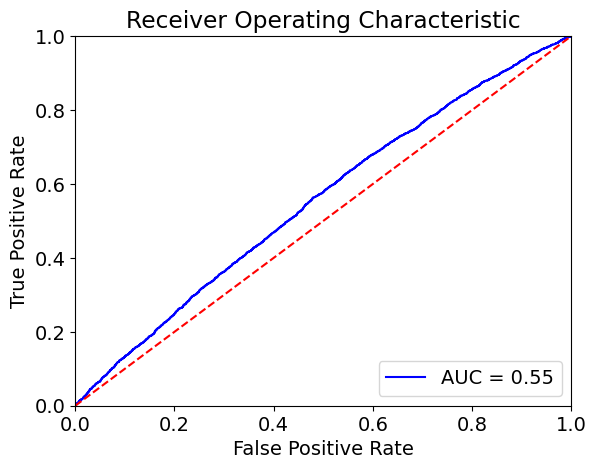

In [39]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
### try comparying with another formula
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
# above returns 59% of true 1 vs predicted 1 scores, not quite area under ROC%

0.5396139448160452


In [41]:
### What is happening above?
print(logreg.predict(X_test))

[1 0 1 ... 0 1 1]


In [42]:
print(logreg.predict_proba(X_test)[:,1])

[0.54921757 0.49342232 0.50645594 ... 0.48834877 0.51231735 0.50141791]


In [43]:
### clearly without using logreg.predict_proba(X_test)[:,1] but just logreg.predict(X_test), 
###  there will be only one pair of non-zero, non-one fpr and tpr. These cannot be used to build a ROC.